In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducer : 
from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages : Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgCUR5zrkIfZ4IeDyXjTMyM3jog3A', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bc4a6cf1-2583-4f93-b301-9c93dbb7f57f-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="gemma2-9b-it")
llm_groq.invoke("Hey, i am Dr. Balmukund, and i would like to know about differnt symbols in p&id diagram")

AIMessage(content="Hello Dr. Balmukund,\n\nI understand you're interested in learning about the symbols used in P&ID diagrams.  \n\nP&ID (Process and Instrumentation Diagram) diagrams use a standardized set of symbols to represent various process equipment, piping, instrumentation, and control elements. \n\nHere's a breakdown of some common symbols you'll encounter:\n\n**Process Equipment:**\n\n* **Vessels:** Cylinders, spheres, or other containers for holding fluids or solids.\n* **Heat Exchangers:** Shown as U-shaped or shell-and-tube configurations.\n* **Reactors:** Typically represented as rectangular shapes with internal features.\n* **Compressors and Pumps:** Usually depicted as circular shapes with arrows indicating flow direction.\n* **Filters and Separators:** Distinctive symbols representing their specific function.\n\n**Piping:**\n\n* **Pipelines:** Represented by lines with varying thicknesses and colors to denote different fluids or materials.\n* **Valves:** Various symbol

In [7]:
def Mishrabot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

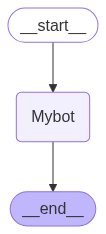

In [9]:
graph = StateGraph(State)
graph.add_node("Mybot", Mishrabot)

graph.add_edge(START, "Mybot")
graph.add_edge("Mybot", END)

graph_builder = graph.compile()

## Display

from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
## Invoking

graph_builder.invoke({"messages": "Hi i am Balmukund, and i am a research scientist"})

{'messages': [HumanMessage(content='Hi i am Balmukund, and i am a research scientist', additional_kwargs={}, response_metadata={}, id='d155faf8-abef-4a31-8882-86b5fbd2644d'),
  AIMessage(content="Hi Balmukund,\n\nIt's nice to meet you! Being a research scientist is fascinating work. \n\nWhat area of research do you specialize in? I'm always eager to learn about new scientific discoveries.\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 22, 'total_tokens': 70, 'completion_time': 0.087272727, 'prompt_time': 0.002131006, 'queue_time': 0.243804333, 'total_time': 0.089403733}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--68959951-5280-4606-ac21-43193a7c5dc1-0', usage_metadata={'input_tokens': 22, 'output_tokens': 48, 'total_tokens': 70})]}

In [15]:
## streaming

graph_builder.stream({"messages": "Hello, my name is Balmukund"})

<generator object Pregel.stream at 0x11a3a11c0>

In [16]:
for event in graph_builder.stream({"messages": "Hello, my name is Balmukund"}):
    print(event)

{'Mybot': {'messages': [AIMessage(content="Hello Balmukund, it's nice to meet you! 👋\n\nHow can I help you today? 😄  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 17, 'total_tokens': 45, 'completion_time': 0.050909091, 'prompt_time': 0.001914167, 'queue_time': 0.26501425199999995, 'total_time': 0.052823258}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--0018a92a-da69-4803-8c19-2c05ffff6df2-0', usage_metadata={'input_tokens': 17, 'output_tokens': 28, 'total_tokens': 45})]}}


In [17]:
for event in graph_builder.stream({"messages": "Hello, my name is Balmukund"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello, my name is Balmukund', additional_kwargs={}, response_metadata={}, id='c4efbc1f-b3b4-42b3-b670-b1785e23a0af')]}
{'messages': [HumanMessage(content='Hello, my name is Balmukund', additional_kwargs={}, response_metadata={}, id='c4efbc1f-b3b4-42b3-b670-b1785e23a0af'), AIMessage(content="Hello Balmukund, it's nice to meet you! 👋 \n\nHow can I help you today? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 17, 'total_tokens': 46, 'completion_time': 0.052727273, 'prompt_time': 0.001982917, 'queue_time': 0.245623072, 'total_time': 0.05471019}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--bfd445e3-de06-4e94-9314-c2816c7a3700-0', usage_metadata={'input_tokens': 17, 'output_tokens': 29, 'total_tokens': 46})]}
